       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

Best k value: 14 with a score of 0.9647468354430379
*****************Confusion Matrix**************************
[[ 59   4]
 [  2 106]]

******************Classification Report******************
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



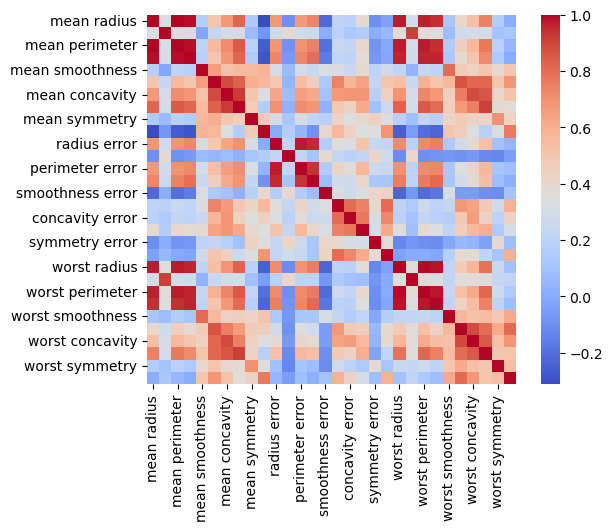

In [89]:
#Qustion Number 1
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier





def fn():
    cancer = load_breast_cancer()
    X = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
    #y = pd.DataFrame(data = cancer.target, columns=['target'])
    y = pd.Series(cancer.target)
    
    #print(y)

    
    #print("*****************Dataset Description **************\n")
    print( X.describe())
    #print("\n******************First 10 rows *****************\n")
    print(X.head(10))
    
    

    #print("*************Missing values in the dataset:**********\n")
    print(X.isnull().sum())
    
    X.fillna(0, inplace = True)

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    
    plt.imshow(X.corr(), cmap='coolwarm')
    sns.heatmap(X.corr(), cmap='coolwarm')
    #plt.title("Correlation Matrix")
    #plt.show()
    
    K = 0
    S = 0
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k)
        s = cross_val_score(knn, X_train_scaled, y_train)
        avg = np.mean(s)
        if avg > S:
            S = avg
            K = k
    print(f"Best k value: {K} with a score of {S}")


    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)
    print("*****************Confusion Matrix**************************")
    print(confusion_matrix(y_test, y_pred))
    
    print("\n******************Classification Report******************")
    print(classification_report(y_test, y_pred))




if __name__ == "__main__":
    fn()

  



In [77]:
#Question Number 2

import numpy as np


def fn(strings):
    res = np.array([s[::-1] for s in strings if len(s[::-1]) >= 5])
    return res

if __name__ == "__main__":

    str = ["labtest", "two", "of", "open","source","oddsem","shouldwork","wont"]
    res = fn(str)
    print(f"Valid Strings : {res}")




Valid Strings : ['tsetbal' 'ecruos' 'mesddo' 'krowdluohs']
